- Training a neural network can become unstable given the choice of error function, activation function, learning rate, or even the scale of the target variable
- Large updates to weights during training can cause a numerical overflow or underflow often referred to as “exploding gradients.”
- The problem of exploding gradients is more common with recurrent neural networks, such as LSTMs given the accumulation of gradients unrolled over hundreds of input time steps
- A common and relatively easy solution to the exploding gradients problem is to change the derivative of the error before propagating it backward through the network and using it to update the weights
- Two approaches include rescaling the gradients given a chosen vector norm and clipping gradient values that exceed a preferred range. Together, these methods are referred to as “gradient clipping.”

#### Exploding Gradients and Clipping

- Neural networks are trained using the stochastic gradient descent optimization algorithm
- This requires first the estimation of the loss on one or more training examples, then the calculation of the derivative of  the loss, which is propagated backward through the network in order to update the weights
- Weights are updated using a fraction of the back propagated error controlled by the learning rate
- It is possible for the updates to the weights to be so large that the weights either overflow or underflow their numerical precision
- In practice, the weights can take on the value of an “NaN” or “Inf” when they overflow or underflow and for practical purposes the network will be useless from that point forward
- By rescaling the error derivative, the updates to the weights will also be rescaled, dramatically decreasing the likelihood of an overflow or underflow
- There are two main methods for updating the error derivative; they are:
    - Gradient Scaling
    - Gradient Clipping
- Gradient scaling involves normalizing the error gradient vector such that vector norm (magnitude) equals a defined value, such as 1.0
- One simple mechanism to deal with a sudden increase in the norm of the gradients is to rescale them whenever they go over a threshold
- Gradient clipping involves forcing the gradient values (element-wise) to a specific minimum or maximum value if the gradient exceeded an expected range
- When the traditional gradient descent algorithm proposes to make a very large step, the gradient clipping heuristic intervenes to reduce the step size to be small enough that it is less likely to go outside the region where the gradient indicates the direction of approximately steepest descent

#### Gradient Clipping in Keras

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Train: nan, Test: nan


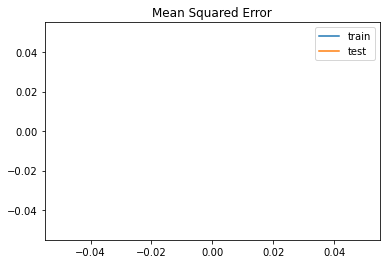

In [1]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Exploded gradients, Holy Shit!!

#### MLP With Gradient Norm Scaling

Train: 0.361, Test: 13.193


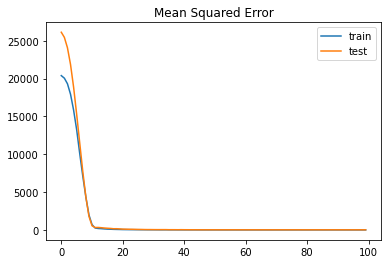

In [2]:
# mlp with unscaled data for the regression problem with gradient norm scaling
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Much better but overfitting exists

#### MLP With Gradient Value Clipping

Train: 29.972, Test: 30.737


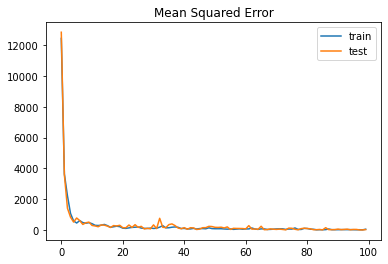

In [3]:
# mlp with unscaled data for the regression problem with gradient clipping
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, clipvalue=5.0)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

error might be more but better genralized